In [1]:
# ---------------------------------------------
# 日本の銘柄はpandas_datareaderで読み込めないので、スクレイピングのメソッドを作って読み込み。
from ok_datareaderYahooJP import datareaderYahooJP
import datetime

# 過去2か月間のデータを取得
from ok_datareaderYahooJP import datareaderYahooJP
end = datetime.datetime.today()
start = end - datetime.timedelta(days=60)
start_x = end - datetime.timedelta(days=30)

ucd = datareaderYahooJP(8057, start=start, end=end)

print('--- ucd.head() ---')
print(ucd.head())

# ---------------------------------------------
# 7日分日付を進める
from ok_setHistoricalDataAhead import setHistoricalDataAhead
ucd_ahead = setHistoricalDataAhead(ucd, 7)
print('--- ucd_ahead.head() ---')
print(ucd_ahead.head())

--- ucd.head() ---
            Open  High   Low  Close  Volume  Adj Close
Date                                                  
2017-05-15  2576  2629  2576   2606    9100       2606
2017-05-16  2598  2625  2598   2624    8400       2624
2017-05-17  2602  2611  2591   2607    8200       2607
2017-05-18  2581  2593  2565   2580    8200       2580
2017-05-19  2581  2588  2570   2578    7900       2578
--- ucd_ahead.head() ---
            Open  High   Low  Close  Volume  Adj Close
Date                                                  
2017-05-22  2576  2629  2576   2606    9100       2606
2017-05-23  2598  2625  2598   2624    8400       2624
2017-05-24  2602  2611  2591   2607    8200       2607
2017-05-25  2581  2593  2565   2580    8200       2580
2017-05-26  2581  2588  2570   2578    7900       2578


In [2]:
#----------------------------------------
# 終値の対数変化率をとって、変化率を計算
import numpy as np
print('--- calculate logarithm of ucd ---')
ucd_Close_ln = np.log(ucd.Close)
print(ucd_Close_ln.head())

# ucd_aheadの終値の指数の対数を取得
ucd_ahead_Close_ln = np.log(ucd_ahead.Close)
print('--- calculate logarithm of ucd_ahead ---')
print(ucd_ahead_Close_ln.head())

--- calculate logarithm of ucd ---
Date
2017-05-15    7.865572
2017-05-16    7.872455
2017-05-17    7.865955
2017-05-18    7.855545
2017-05-19    7.854769
Name: Close, dtype: float64
--- calculate logarithm of ucd_ahead ---
Date
2017-05-22    7.865572
2017-05-23    7.872455
2017-05-24    7.865955
2017-05-25    7.855545
2017-05-26    7.854769
Name: Close, dtype: float64


(12378, 12400)

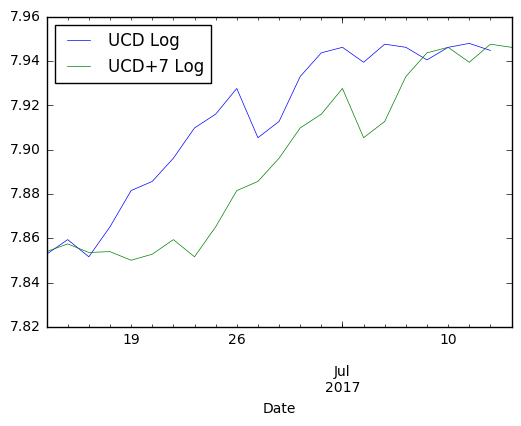

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# -------------------------------------
fig_1 = plt.figure()
g_1=fig_1.add_subplot(1,1,1)
ucd_Close_ln.plot(ax=g_1, style='b-',linewidth=0.5, label='UCD Log')
ucd_ahead_Close_ln.plot(ax=g_1, style='g-',linewidth=0.5, label='UCD+7 Log')
g_1.legend(loc='upper left')
g_1.set_xlim([start_x,end])

Date
2017-05-15    6.864816
2017-05-16    6.873236
2017-05-17    6.850931
2017-05-18    6.865359
2017-05-19    6.866767
Name: Close, dtype: float64
Date
2017-05-15    5.047931
2017-05-16    5.046453
2017-05-17    5.012301
2017-05-18    5.027427
2017-05-19    5.030830
Name: Close, dtype: float64


(736493.6395826673, 736523.6395826673)

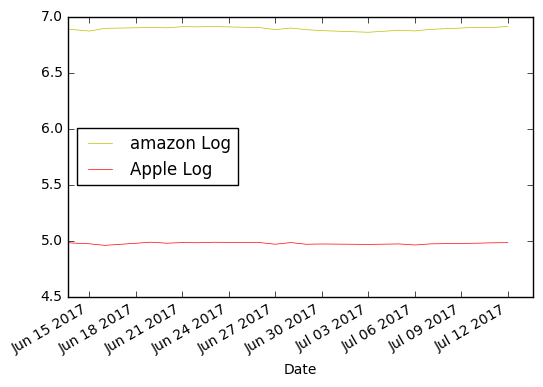

In [4]:
import pandas_datareader.data as pdr
%matplotlib inline
import matplotlib.pyplot as plt

#--------------------------------------
# 例えばAazon
ama = pdr.DataReader("AMZN", "google", start, end)
ama_Close_nl= np.log(ama.Close)

ama_ahead =  setHistoricalDataAhead(ama, 7)
ama_ahead_Close_nl= np.log(ama_ahead.Close)

print(ama_Close_nl.head())
#print(ama_ahead_Close_nl.head())

# 例えばApple
apl = pdr.DataReader("AAPL", "google", start, end)
apl_Close_nl = np.log(apl.Close)

apl_ahead =  setHistoricalDataAhead(apl, 7)
apl_ahead_Close_nl = np.log(apl_ahead.Close)

print(apl_Close_nl.head())
#print(apl_ahead_Close_nl.head())

# -------------------------------------
fig_00 = plt.figure()
g_00=fig_00.add_subplot(1,1,1)
ama_Close_nl.plot(ax=g_00, style='y-',linewidth=0.5, label='amazon Log')
apl_Close_nl.plot(ax=g_00, style='r-',linewidth=0.5, label='Apple Log')
g_00.legend(loc='center left')
g_00.set_xlim([start_x,end])

(-1, 1)

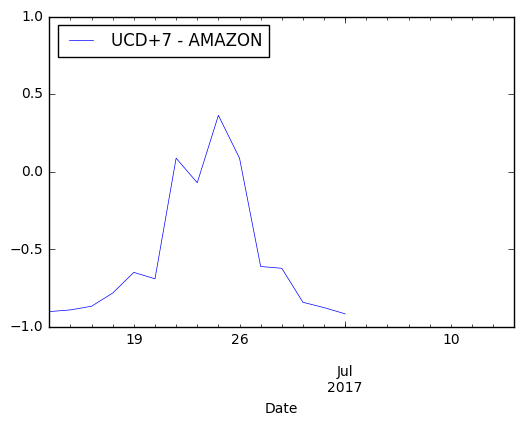

In [5]:
import pandas as pd
# 7日間先に進めたUCDの対数変化率の1週間移動平均と、AMAZONの対数変化率の相関曲線を描画
fig_2 = plt.figure()
g_2=fig_2.add_subplot(1,1,1)
pd.Series.rolling(ucd_ahead_Close_ln, window=7).corr(ama_Close_nl).dropna().plot(ax=g_2, style='b-',linewidth=0.5, label='UCD+7 - AMAZON')
g_2.legend(loc='upper left')
g_2.set_xlim([start_x,end])
g_2.set_ylim([-1,1])


(-1, 1)

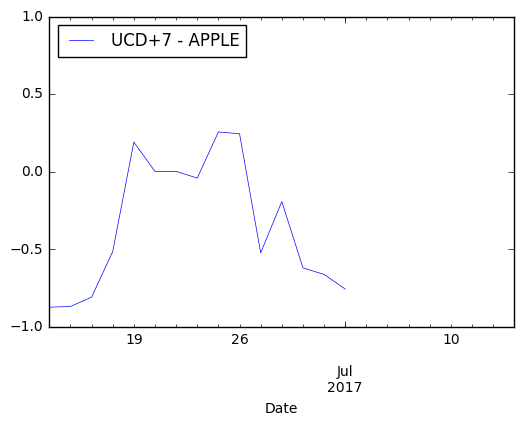

In [6]:
fig_3 = plt.figure()
g_3=fig_3.add_subplot(1,1,1)
pd.Series.rolling(ucd_ahead_Close_ln, window=7).corr(apl_Close_nl).dropna().plot(ax=g_3, style='b-',linewidth=0.5, label='UCD+7 - APPLE')
g_3.legend(loc='upper left')
g_3.set_xlim([start_x,end])
g_3.set_ylim([-1,1])


(-1, 1)

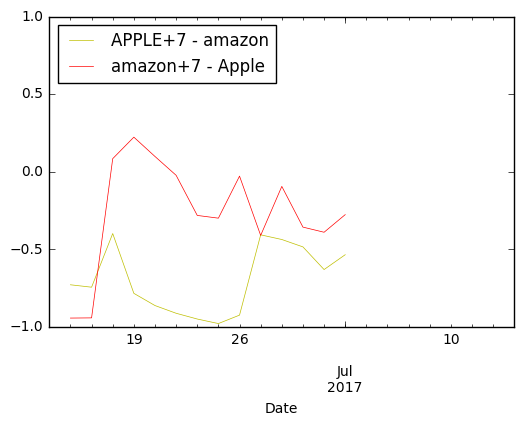

In [7]:
fig_4 = plt.figure()
g_4=fig_4.add_subplot(1,1,1)
pd.Series.rolling(apl_ahead_Close_nl, window=7).corr(ama_Close_nl).dropna().plot(ax=g_4, style='y-',linewidth=0.5, label='APPLE+7 - amazon')
pd.Series.rolling(ama_ahead_Close_nl, window=7).corr(apl_Close_nl).dropna().plot(ax=g_4, style='r-',linewidth=0.5, label='amazon+7 - Apple')
g_4.legend(loc='upper left')
g_4.set_xlim([start_x,end])
g_4.set_ylim([-1,1])
